# BANK REVIEW / COMPLAINT'S ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import nltk
import string
import re

plt.rcParams['figure.figsize']=10,7
plt.rcParams['axes.grid']=False

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing data set

banks=pd.read_excel("F:\\Akash\\New folder\\Project 5\\BankReviews.xlsx")

## DATA AUDIT

In [3]:
banks.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
banks.shape

(505, 4)

In [5]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [6]:
banks.isna().sum().sum()

0

## TEXT PREPROCESSING

In [7]:
## Dropping date variable as it will not play any role in text mining
banks=banks.drop(['Date'], axis=1)

In [8]:
banks=banks.drop(['BankName'], axis=1)

In [9]:
banks.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


### Text Lowercase

In [10]:
# lowercase the text to reduce the size of the vocabulary of our text data.

def text_lowercase(text):
    return text.lower()

banks['Reviews_clean']=banks['Reviews'].apply(text_lowercase)

In [11]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","great job, wyndham capital! each person was pr..."
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i can't express how grateful i am for the supp...


### Remove Numbers

Remove Numbers by converting them into words by using inflect library

### Remove punctuations

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
    text_nonpunc="".join([char for char in text if char not in string.punctuation])
    return text_nonpunc

banks['Reviews_clean']=banks['Reviews_clean'].apply(remove_punct)

In [14]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


### Remove Whitespaces

In [15]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [16]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lambda x:remove_whitespaces(x))

In [17]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital each person was prof...
1,5,Matthew Richardson is professional and helpful...,matthew richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...,we had a past experience with wyndham mortgage...
3,5,We have been dealing with Brad Thomka from the...,we have been dealing with brad thomka from the...
4,5,I can't express how grateful I am for the supp...,i cant express how grateful i am for the suppo...


### Tokenization using re

In [18]:
## Stopwords are unnecessary words like was, each etc.
## Tokenization means breaking text into individual words

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

banks['Reviews_clean'] = banks['Reviews_clean'].apply(lambda x: tokenize(x))

banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, each, person, w..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, is, professional, and, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[we, had, a, past, experience, with, wyndham, ..."
3,5,We have been dealing with Brad Thomka from the...,"[we, have, been, dealing, with, brad, thomka, ..."
4,5,I can't express how grateful I am for the supp...,"[i, cant, express, how, grateful, i, am, for, ..."


### Remove stopwords

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
# NLTK - Natural Language Tool Kit is library to perform analysis on text 
# Corpus means bag of words 
#stopword = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(tokenized_list):
    filtered_text=[word for word in tokenized_list if word not in stop]
    return filtered_text

In [22]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lambda x:remove_stopwords(x))

In [23]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


## Lemmatization

In [24]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
## Lemmatization is bring altogether all simmilar kind of words and create a single word out
import nltk
wn=nltk.stem.WordNetLemmatizer()

def lemmatizing(text):
    lemma=[wn.lemmatize(word) for word in text]
    return lemma

In [26]:
banks['Reviews_clean']=banks['Reviews_clean'].apply(lemmatizing)

In [27]:
banks.head()

,Stars,Reviews,Reviews_clean
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess..."
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h..."
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w..."
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st..."
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi..."


## COUNT OF MOST FREQUENT WORDS

In [28]:
word_count={}

for sentence in banks['Reviews_clean']:
    for word in sentence:
        
        if word not in word_count:
            word_count[word]=1
            
        else:
            word_count[word]+=1  

In [29]:
word_count

{'great': 139,
 'job': 21,
 'wyndham': 16,
 'capital': 12,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'u': 207,
 'move': 12,
 'refinance': 70,
 'process': 248,
 'smoothly': 14,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 51,
 'find': 19,
 'correct': 1,
 'product': 13,
 'mortgage': 151,
 'much': 38,
 'excellent': 29,
 'service': 103,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 106,
 'use': 48,
 'needed': 29,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 26,
 'wrong': 7,
 'encountered': 5,
 'servicer': 3,
 'dealing': 16,
 'previous': 13,
 'loan': 326,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 31,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 62,
 'recommend': 150,
 'brad': 7,
 'thomka': 3,
 'team': 112,
 'need': 41,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'time': 217,
 'help': 38,
 'entire': 47,
 'turned': 3,
 '

In [30]:
## Converting word_count into the dataframe

df=pd.DataFrame(word_count.items(), columns=['word','word_count'])
df=df.sort_values('word_count', ascending=False).reset_index(drop=True)
df.head()

,word,word_count
0,x000d,715
1,loan,326
2,process,248
3,would,246
4,time,217


## SENTIMENT ANALYSIS

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
analyser=SentimentIntensityAnalyzer()

def sentiment_pos(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['pos']

def sentiment_neg(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neg']

def sentiment_neu(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['neu']

def sentiment_comp(sentence):
    sent=analyser.polarity_scores(sentence)
    return sent['comp']

In [33]:
df['positive']=df['word'].apply(sentiment_pos)
df['negative']=df['word'].apply(sentiment_neg)

In [34]:
df.head()

,word,word_count,positive,negative
0,x000d,715,0.0,0.0
1,loan,326,0.0,0.0
2,process,248,0.0,0.0
3,would,246,0.0,0.0
4,time,217,0.0,0.0


## KEY POSITIVE WORDS

In [35]:
df1=df.loc[df.positive>0]['word']
df1

10      recommend
12          great
23           best
48           easy
49         thanks
          ...    
2588      perfect
2589     superior
2594      feeling
2600        prize
2601       winner
Name: word, Length: 280, dtype: object

## KEY NEGATIVE WORDS

In [36]:
df2=df.loc[df.negative>0]['word']
df2

89           hard
107       problem
114          poor
173           pay
177     stressful
          ...    
2572      painful
2577     fighting
2581       forget
2598      ignored
2609    seriously
Name: word, Length: 147, dtype: object

In [37]:
## CLASSIFICATION OF REVIEWS 
banks['positive']=banks['Reviews'].apply(sentiment_pos)
banks['negative']=banks['Reviews'].apply(sentiment_neg)
banks['neutral']=banks['Reviews'].apply(sentiment_neu)

In [38]:
banks.head()

,Stars,Reviews,Reviews_clean,positive,negative,neutral
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st...",0.226,0.018,0.756
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861


## WORDCLOUD

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
comment_words=''
stopwords=set(STOPWORDS)

for x in banks.Reviews:
    
    x=str(x)
    
    tokens=x.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    for y in tokens:
        comment_words=comment_words+y+' '

In [42]:
comment_words

'great job, wyndham capital! each person was professional and helped us move through our refinance process smoothly. thank you! matthew richardson is professional and helpful. he helped us find the correct product for our mortgage. thank you very much for the excellent service, matthew! we had a past experience with wyndham mortgage and would without question use again and again if needed!! wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. we would highly recommend brad thomka and the wyndham capital mortgage team for your mortgage needs. sincerest thanks wyndham!! ed & lind we have been dealing with brad thomka from the beginning of what started out to be a very stressful time for us, but with the help from brad and the entire wyndham mortgage team it was turned into a happy ending!! brad and wyndham went beyond the ex

In [43]:
wordcloud=WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

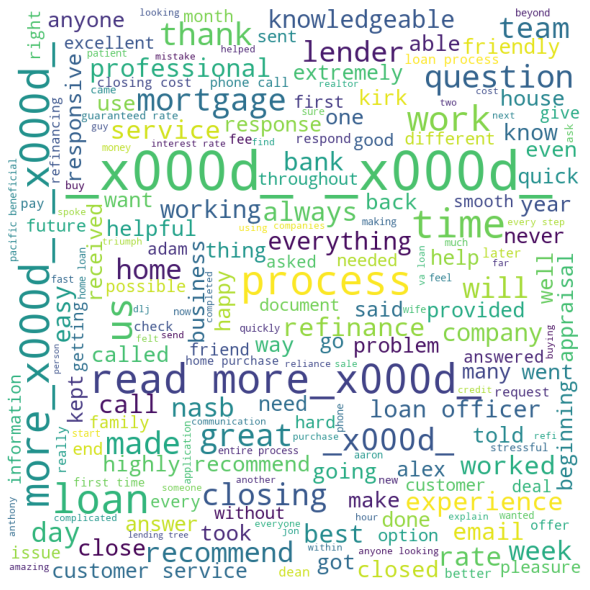

In [44]:
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

## IDENTIFY KEY THEMES OF PROBLEMS USING K-MEANS ALGORITHM

In [45]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
## getting the negative reviews for identifying the key themes of problems
problems=banks.loc[banks.negative>0]['Reviews']
problems.head()

3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
5    I had the pleasure of working with Wyndham Cap...
6    My experience with Mattison was beyond greatly...
8    I loved working with this group of people! The...
Name: Reviews, dtype: object

### VECTORIZING RAW DATA: TF-IDF

In [47]:
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(problems)

In [48]:
X

<261x2136 sparse matrix of type '<class 'numpy.float64'>'
	with 10699 stored elements in Compressed Sparse Row format>

In [51]:
## Now, implementing k-means algorithm to get the model so that we can fit into X
k=3
model= KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto')


model.fit(X)

KMeans(n_clusters=3)

In [52]:
## getting the centroids and features
centroids= model.cluster_centers_.argsort()[:, ::-1]
features=vectorizer.get_feature_names()

In [53]:
for i in range(0,3):
    print('\n\nCluster %d:' % i)
    for ind in centroids[i, :10]:
        print('\t  - %s' % features[ind])



Cluster 0:
	  - _x000d_
	  - process
	  - questions
	  - alex
	  - team
	  - adam
	  - hard
	  - working
	  - recommend
	  - work


Cluster 1:
	  - _x000d_
	  - closing
	  - loan
	  - home
	  - mortgage
	  - weeks
	  - time
	  - process
	  - nasb
	  - recommend


Cluster 2:
	  - loan
	  - _x000d_
	  - poor
	  - kory
	  - officer
	  - best
	  - time
	  - process
	  - nasb
	  - rate


In [54]:
### predicting the text sentence and tell into which cluster the sentence belongs to.
X=vectorizer.transform(banks.Reviews)
banks['cluster']=model.predict(X)
banks.head()

,Stars,Reviews,Reviews_clean,positive,negative,neutral,cluster
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703,0
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703,1
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794,0
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st...",0.226,0.018,0.756,0
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861,1


In [55]:
# Now creating the Tf-Idf model
vectorizer=TfidfVectorizer(min_df=0.05, max_df=0.8, max_features=2000)
X = vectorizer.fit_transform(banks.Reviews).toarray()

## Logistic Regression technique


In [56]:
from sklearn.model_selection import train_test_split

## Splitting the data into train and test

X_train,X_test,y_train,y_test= train_test_split(X, banks.Stars, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [58]:
from sklearn import metrics

train_accuracy=metrics.accuracy_score(y_train, log.predict(X_train))
test_accuracy=metrics.accuracy_score(y_test, log.predict(X_test))

print("train_accuracy:", train_accuracy)
print("test_accuracy:", test_accuracy)

train_accuracy: 0.8980169971671388
test_accuracy: 0.881578947368421


In [59]:
# roc_auc_score
train_roc_auc = metrics.roc_auc_score(y_train, log.predict(X_train))
print('Roc Auc Score of training dataset: ', train_roc_auc)

test_roc_auc = metrics.roc_auc_score(y_test, log.predict(X_test))
print('Roc Auc Score of testing dataset: ', test_roc_auc)

Roc Auc Score of training dataset:  0.7114024253312374
Roc Auc Score of testing dataset:  0.7352941176470589


In [61]:
from sklearn import metrics

# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, log.predict(X_test))
cm

array([[ 16,  18],
       [  0, 118]], dtype=int64)

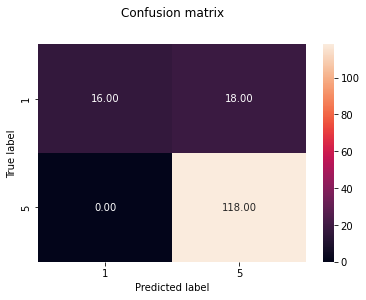

In [62]:
# visualizing Confusion Matrix using Heatmap
sn.heatmap(cm, annot=True, fmt='.2f', xticklabels=["1", "5"], yticklabels=["1", "5"])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.autoscale(enable=True, axis='y')

In [63]:
# Concatenating final prediction with original data set(all obersvations):
pred_stars = pd.DataFrame(log.predict(X), columns = ['predicted_stars'])
final = pd.concat([banks, pred_stars], axis=1)

In [64]:
final.head()

,Stars,Reviews,Reviews_clean,positive,negative,neutral,cluster,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...","[great, job, wyndham, capital, person, profess...",0.297,0.000,0.703,0,5
1,5,Matthew Richardson is professional and helpful...,"[matthew, richardson, professional, helpful, h...",0.297,0.000,0.703,1,5
2,5,We had a past experience with Wyndham Mortgage...,"[past, experience, wyndham, mortgage, would, w...",0.206,0.000,0.794,0,5
3,5,We have been dealing with Brad Thomka from the...,"[dealing, brad, thomka, beginning, started, st...",0.226,0.018,0.756,0,5
4,5,I can't express how grateful I am for the supp...,"[cant, express, grateful, support, zach, provi...",0.099,0.040,0.861,1,5
